In [167]:
from keras.layers import Dense,LSTM,Embedding
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.cross_validation import train_test_split
import numpy as np
from gensim.models import Word2Vec
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

file=open('kafka.txt')
string=file.read()
words=string.split()

sentences=[words[i:i+5] for i in range(5000)]
targets=[words[i+5] for i in range(5000)]


vocab=list(set(words[:5005]))

words_to_code=dict((i,j) for j,i in enumerate(vocab))
code_to_words=dict((i,j) for i,j in enumerate(vocab))
newtargets=[words_to_code[w] for w in targets]
for i in range(5000):
    for j in range(5):
        sentences[i][j]=words_to_code[sentences[i][j]]
sentences=np.array(sentences)



newtargets=to_categorical(newtargets,num_classes=len(vocab))
newtargets=np.array(newtargets)

model=Sequential()
model.add(Embedding(len(vocab),40,input_length=5))
model.add(LSTM(40,dropout=0.3,input_shape=(5,40)))
model.add(Dense(len(vocab),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

X_train,X_test,Y_train,Y_test=train_test_split(sentences,newtargets)

In [168]:
history=model.fit(X_train,Y_train,epochs=200,)
model.save('newtextmodel.h5')

Epoch 1/200
3750/3750 [==============================] - 4s 1ms/step - loss: 6.9525 - acc: 0.0427
Epoch 2/200
3750/3750 [==============================] - 2s 472us/step - loss: 6.1550 - acc: 0.0467
Epoch 3/200
3750/3750 [==============================] - 2s 472us/step - loss: 6.0668 - acc: 0.0443
Epoch 4/200
3750/3750 [==============================] - 2s 473us/step - loss: 6.0103 - acc: 0.0467
Epoch 5/200
3750/3750 [==============================] - 2s 475us/step - loss: 5.9568 - acc: 0.0467
Epoch 6/200
3750/3750 [==============================] - 2s 466us/step - loss: 5.9115 - acc: 0.0445
Epoch 7/200
3750/3750 [==============================] - 2s 472us/step - loss: 5.8666 - acc: 0.0467
Epoch 8/200
3750/3750 [==============================] - 2s 470us/step - loss: 5.8227 - acc: 0.0451
Epoch 9/200
3750/3750 [==============================] - 2s 478us/step - loss: 5.7915 - acc: 0.0467
Epoch 10/200
3750/3750 [==============================] - 2s 473us/step - loss: 5.7562 - acc: 0.0472
E

3750/3750 [==============================] - 2s 508us/step - loss: 2.9014 - acc: 0.3707
Epoch 83/200
3750/3750 [==============================] - 2s 510us/step - loss: 2.8502 - acc: 0.3843
Epoch 84/200
3750/3750 [==============================] - 2s 508us/step - loss: 2.8325 - acc: 0.3909
Epoch 85/200
3750/3750 [==============================] - 2s 507us/step - loss: 2.7991 - acc: 0.3901
Epoch 86/200
3750/3750 [==============================] - 2s 528us/step - loss: 2.7648 - acc: 0.4011
Epoch 87/200
3750/3750 [==============================] - 2s 500us/step - loss: 2.7336 - acc: 0.4075
Epoch 88/200
3750/3750 [==============================] - 2s 523us/step - loss: 2.7098 - acc: 0.4149
Epoch 89/200
3750/3750 [==============================] - 2s 507us/step - loss: 2.6758 - acc: 0.4187
Epoch 90/200
3750/3750 [==============================] - 2s 515us/step - loss: 2.6384 - acc: 0.4328
Epoch 91/200
3750/3750 [==============================] - 2s 511us/step - loss: 2.6292 - acc: 0.4384
Epo

3750/3750 [==============================] - 2s 611us/step - loss: 1.2731 - acc: 0.7344
Epoch 163/200
3750/3750 [==============================] - 2s 609us/step - loss: 1.2570 - acc: 0.7341
Epoch 164/200
3750/3750 [==============================] - 2s 550us/step - loss: 1.2514 - acc: 0.7331
Epoch 165/200
3750/3750 [==============================] - 2s 529us/step - loss: 1.2519 - acc: 0.7413
Epoch 166/200
3750/3750 [==============================] - 2s 547us/step - loss: 1.2258 - acc: 0.7379
Epoch 167/200
3750/3750 [==============================] - 2s 553us/step - loss: 1.2109 - acc: 0.7493
Epoch 168/200
3750/3750 [==============================] - 2s 546us/step - loss: 1.2128 - acc: 0.7432
Epoch 169/200
3750/3750 [==============================] - 2s 534us/step - loss: 1.2007 - acc: 0.7443
Epoch 170/200
3750/3750 [==============================] - 2s 540us/step - loss: 1.2087 - acc: 0.7355
Epoch 171/200
3750/3750 [==============================] - 2s 542us/step - loss: 1.1702 - acc: 0

In [184]:
?model.fit

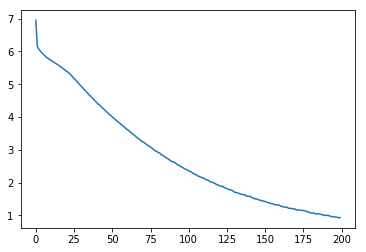

In [170]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()


In [182]:
def generate_test():
    import time
    sentence='His room, a proper human'
    sentence=sentence.split()
    sentence=[words_to_code[w] for w in sentence]
    sentence=np.array(sentence)
    sentence=sentence.reshape(1,5)
    
    model=load_model('newtextmodel.h5')
    
    while True:
        x=np.argmax(model.predict(sentence))
        print(code_to_words[x],end=' ')
        sentence=sentence.flatten()
        sentence=sentence.tolist()
        sentence.append(x)
        sentence=sentence[1:]
        sentence=np.array(sentence)
        sentence=sentence.reshape(1,5)
        time.sleep(1)

In [183]:
generate_test()

room although he was curious been learn what it him how couldn't break his head the chief clerk himself. Why Gregor said that not too be enough and this through, for himself. Meanwhile, it had onto a adhesive muffled to the door he lad of froze warning And he just easily If, however, all him if caught was unable to decide to the door but his sister words teeth but it would have I'll have what it a room." he thought, to the chief clerk himself. Why Gregor said that not too be enough and this through, for himself. Meanwhile, it had onto a adhesive muffled to the door he lad of froze warning And he just easily If, however, all him if caught was unable to decide to the door but his sister words teeth but it would have I'll have what it a room." he thought, to the chief clerk himself. Why Gregor said that not too be enough and this through, for himself. 

KeyboardInterrupt: 